In [1]:

import sys
sys.path.append('../')

import torch
import time
from Config.gan_xr_options import gan_xr_v1 
from Data import CreateDataLoader
from Model import create_model
from Utils.visualizer import Visualizer
import numpy as np


opt = gan_xr_v1()
data_loader = CreateDataLoader(opt)

dataset = data_loader.load_data()
dataset_size = len(data_loader)
print('#training images = %d' % dataset_size)

model = create_model(opt)
visualizer = Visualizer(opt)
total_steps = 0

CustomDatasetDataLoader
dataset [AlignedDataset_XR] was created
#training images = 10000
p2p_xr
-----Initialize Model-----
normalization method [instance]
initialization method [normal]
normalization method [instance]
initialization method [normal]
---------- Networks initialized -------------
ResnetGenerator(
  (model): Sequential(
    (0): ReflectionPad2d((3, 3, 3, 3))
    (1): Conv2d(1, 32, kernel_size=(7, 7), stride=(1, 1))
    (2): InstanceNorm2d(32, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (3): ReLU(inplace=True)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (6): ReLU(inplace=True)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (8): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (9): ReLU(inplace=True)
    (10): ResnetBlock(
      (conv_block): Sequent

In [2]:



# In[ ]:
for epoch in range(opt.epoch_count, opt.niter + opt.niter_decay + 1):
    epoch_start_time = time.time()
    iter_data_time = time.time()
    epoch_iter = 0

    for i, data in enumerate(dataset):
        iter_start_time = time.time()
        if total_steps % opt.print_freq == 0:
            t_data = iter_start_time - iter_data_time
        visualizer.reset()
        total_steps += opt.batchSize
        epoch_iter += opt.batchSize
        model.set_input(data)
        model.optimize_parameters()

        if total_steps % opt.display_freq == 0:
            save_result = total_steps % opt.update_html_freq == 0
            visualizer.display_current_results(model.get_current_visuals(), epoch, save_result)

        if total_steps % opt.print_freq == 0:
            errors = model.get_current_errors()
            t = (time.time() - iter_start_time) / opt.batchSize
            visualizer.print_current_errors(epoch, epoch_iter, errors, t, t_data)
            if opt.display_id > 0:
                visualizer.plot_current_errors(epoch, float(epoch_iter) / dataset_size, opt, errors)

        if total_steps % opt.save_latest_freq == 0:
            print('saving the latest model (epoch %d, total_steps %d)' %
                  (epoch, total_steps))
            model.save('latest')

        iter_data_time = time.time()
    if epoch % opt.save_epoch_freq == 0:
        print('saving the model at the end of epoch %d, iters %d' %
              (epoch, total_steps))
        model.save('latest')
        model.save(epoch)

    print('End of epoch %d / %d \t Time Taken: %d sec' %
          (epoch, opt.niter + opt.niter_decay, time.time() - epoch_start_time))
    model.update_learning_rate()




(epoch: 1, iters: 800, time: 0.033, data: 0.801) 
(epoch: 1, iters: 1600, time: 0.032, data: 0.002) 
(epoch: 1, iters: 2400, time: 0.033, data: 0.002) 
(epoch: 1, iters: 3200, time: 0.033, data: 0.002) 
(epoch: 1, iters: 4000, time: 0.033, data: 0.002) 
(epoch: 1, iters: 4800, time: 0.033, data: 0.002) 
(epoch: 1, iters: 5600, time: 0.033, data: 0.002) 
(epoch: 1, iters: 6400, time: 0.034, data: 0.002) 
(epoch: 1, iters: 7200, time: 0.033, data: 0.002) 
(epoch: 1, iters: 8000, time: 0.033, data: 0.021) 
(epoch: 1, iters: 8800, time: 0.033, data: 0.002) 
(epoch: 1, iters: 9600, time: 0.034, data: 0.002) 
End of epoch 1 / 200 	 Time Taken: 209 sec
learning rate = 0.0002000
(epoch: 2, iters: 384, time: 0.033, data: 0.002) 
(epoch: 2, iters: 1184, time: 0.034, data: 0.010) 
(epoch: 2, iters: 1984, time: 0.035, data: 0.002) 
(epoch: 2, iters: 2784, time: 0.033, data: 0.002) 
(epoch: 2, iters: 3584, time: 0.033, data: 0.002) 
(epoch: 2, iters: 4384, time: 0.033, data: 0.002) 
(epoch: 2, iter

Process Process-144:
Process Process-131:
Process Process-139:
Process Process-138:
Process Process-141:
Process Process-142:
Process Process-133:
Process Process-143:
Process Process-135:
Process Process-140:
Process Process-136:
Process Process-134:
Process Process-132:
Process Process-130:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/mnt/DATA_ubuntu/home/john/miniconda3/lib/python3.7/multiprocessing/process.py", line 300, in _bootstrap
    util._exit_function()
Traceback (most recent call last):
  File "/mnt/DATA_ubuntu/home/john/miniconda3/lib/python3.7/multiprocessing/process.py", line 300, in _bootstrap
    util._exit_function()
  File "/mnt/DATA_ubuntu/home/john/miniconda3/lib/python3.7/multiprocessing/process.py", line 300, in _bootstrap
    util._exit_function()
  File "/mnt/DATA_ubuntu/home/john/miniconda

KeyboardInterrupt: 

(-0.5, 255.5, 255.5, -0.5)

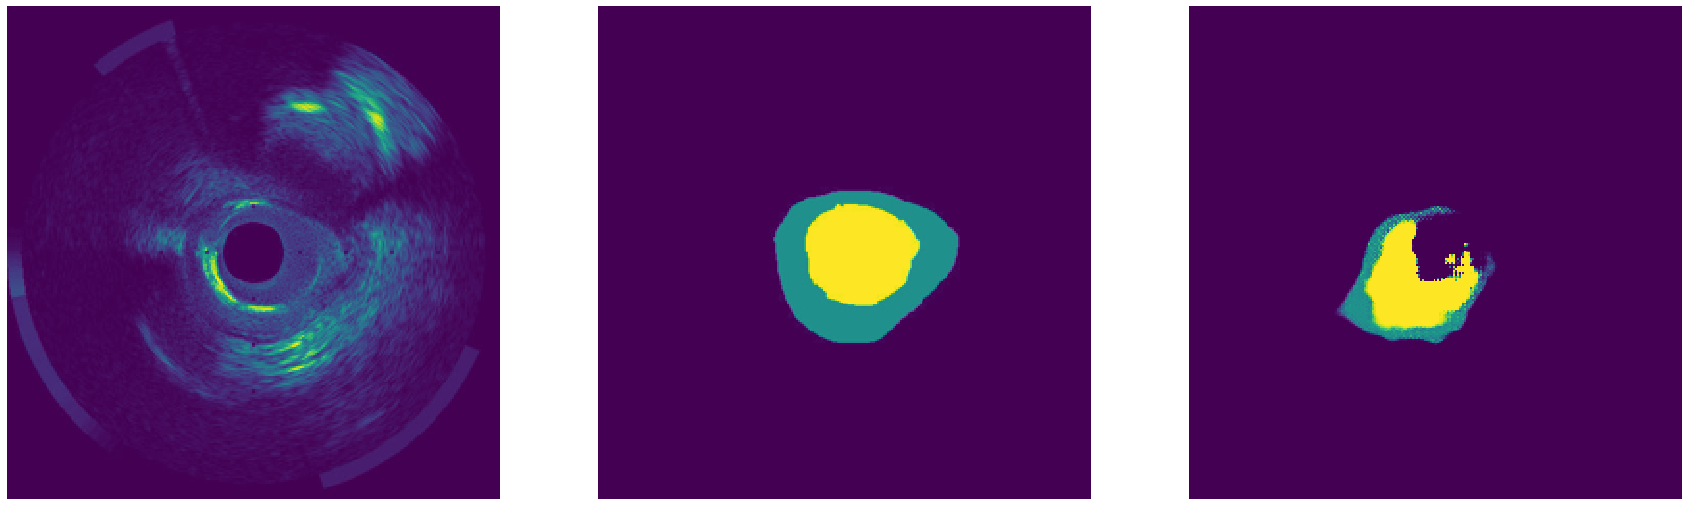

In [32]:
tin = dataset.dataset.__getitem__(145)
tout = model.netG(tin['A'].unsqueeze(0).cuda())

plt.figure(figsize=[30,10])
plt.subplot(1,3,1)
plt.imshow(tin['A'].numpy()[0])
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(tin['B'].numpy()[0])
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(tout.data.cpu().numpy()[0][0])
plt.axis('off')